# TITANIC SURVIVAL PREDICTION 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# Loading dataset 

In [2]:
data = pd.read_csv('tested.csv')

# Data Cleaning 

In [3]:
data = data.drop(columns = 'Name', axis = 1)

In [4]:
data = data.drop(columns = 'PassengerId', axis = 1)

In [5]:
data = data.drop(columns = ['Cabin','Embarked'], axis = 1)

In [6]:
data = data.drop(columns = 'Ticket', axis = 1)

In [7]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,34.5,0,0,7.8292
1,1,3,female,47.0,1,0,7.0000
2,0,2,male,62.0,0,0,9.6875
3,0,3,male,27.0,0,0,8.6625
4,1,3,female,22.0,1,1,12.2875


#  Exploratory Data Analysis (EDA)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
data.describe(include = 'all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418,332.000000,418.000000,418.000000,417.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN,NaN
freq,NaN,NaN,266,NaN,NaN,NaN,NaN
mean,0.363636,2.265550,NaN,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,NaN,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,NaN,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,NaN,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,NaN,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,39.000000,1.000000,0.000000,31.500000


In [3]:
data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

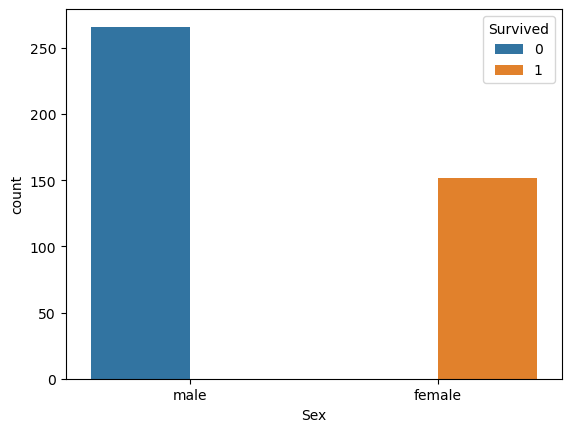

In [31]:
sns.countplot(hue = data['Survived'], x = data['Sex'])

<AxesSubplot:xlabel='Age', ylabel='Survived'>

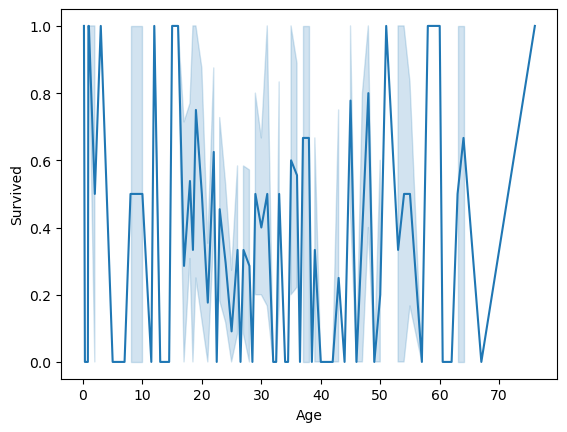

In [54]:
sns.lineplot(data= data, x = 'Age', y = 'Survived')

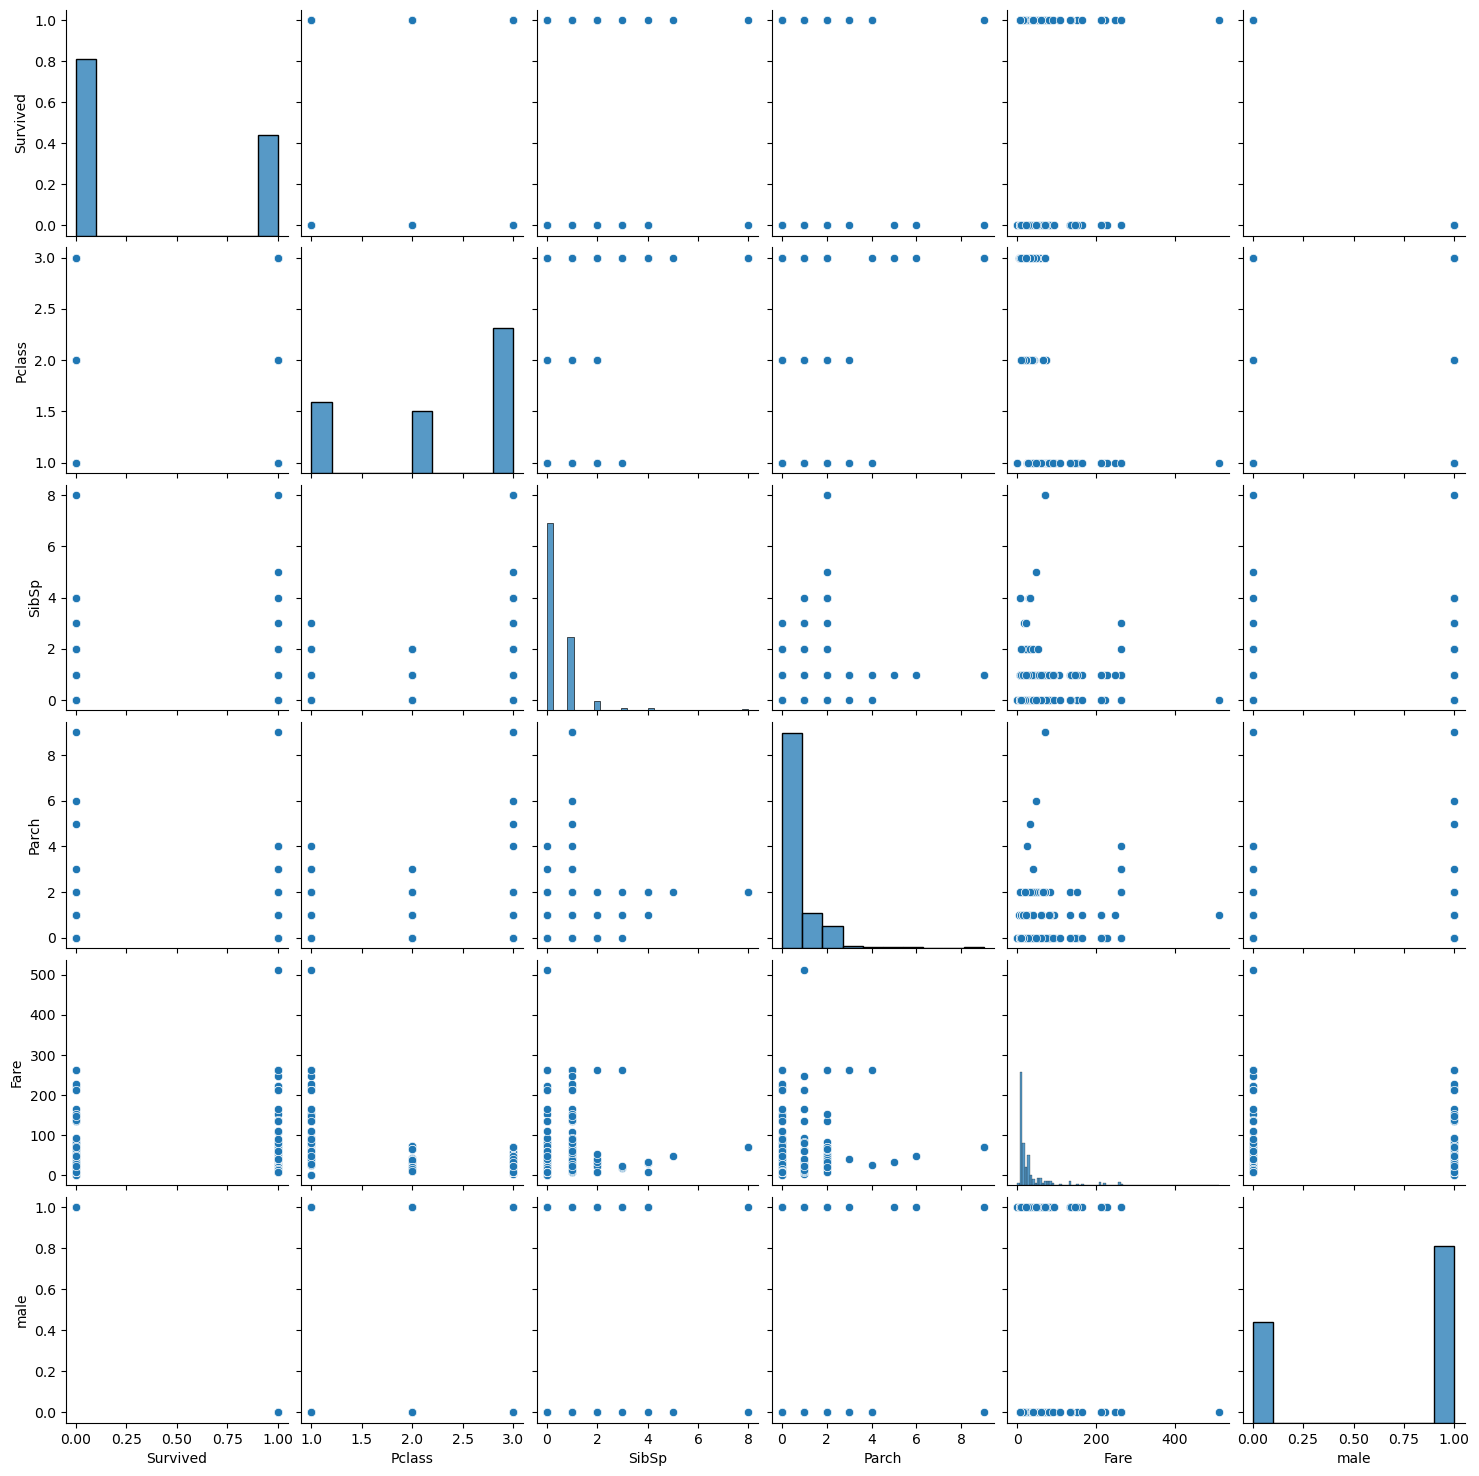

In [66]:
sns.pairplot(data)

In [67]:
corr_mat = data.corr()

<AxesSubplot:>

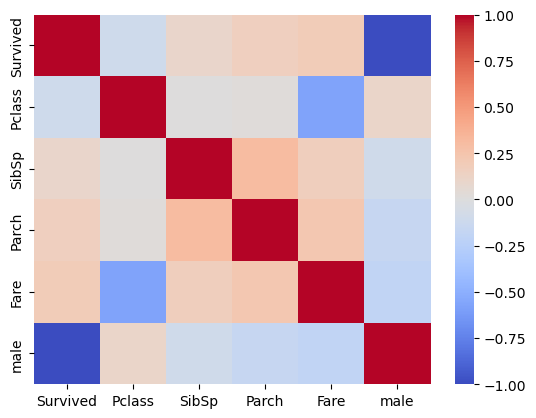

In [68]:
sns.heatmap(data= corr_mat, cmap = 'coolwarm')

# Data Preprocessing 

In [55]:
data = data.drop(columns = 'Age', axis = 1)

In [56]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,0,0,7.8292
1,1,3,female,1,0,7.0000
2,0,2,male,0,0,9.6875
3,0,3,male,0,0,8.6625
4,1,3,female,1,1,12.2875


In [60]:
data['Fare'].fillna(data['Fare'].mean(), inplace = True)

In [62]:
sex = pd.get_dummies(data['Sex'], drop_first = True)

In [64]:
data_1 = data.drop(columns = 'Sex')
data = pd.concat([data_1, sex], axis = 1)

In [65]:
data.head()

,Survived,Pclass,SibSp,Parch,Fare,male
0,0,3,0,0,7.8292,1
1,1,3,1,0,7.0000,0
2,0,2,0,0,9.6875,1
3,0,3,0,0,8.6625,1
4,1,3,1,1,12.2875,0


# Train_test_Split 

In [72]:
x = data.drop(columns = 'Survived', axis = 1)
y = data['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

# Model Selection 

## Random Forest Classifier 

In [74]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
y_pred = rfc_model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## Support Vector Machine

In [76]:
svc_model = SVC()
svc_model.fit(x_train, y_train)
y_pred = svc_model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6587301587301587
              precision    recall  f1-score   support

           0       0.67      0.98      0.79        85
           1       0.00      0.00      0.00        41

    accuracy                           0.66       126
   macro avg       0.33      0.49      0.40       126
weighted avg       0.45      0.66      0.54       126



## Logistic Regression 

In [77]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## Gaussian Naive Bayes 

In [78]:
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
y_pred = gnb_model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [79]:
mnb_model = MultinomialNB()
mnb_model.fit(x_train, y_train)
y_pred = mnb_model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7619047619047619
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        85
           1       0.87      0.32      0.46        41

    accuracy                           0.76       126
   macro avg       0.81      0.65      0.66       126
weighted avg       0.79      0.76      0.72       126



In [80]:
bnb_model = BernoulliNB()
bnb_model.fit(x_train, y_train)
y_pred = bnb_model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



# MODEL 

## RANDOM FOREST CLASSIFIER 

In [81]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
y_pred = rfc_model.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



## Based on the performance, Random Forest Classifier has been selected as a Model to the TITANIC SURVIVAL PREDICTION.


## RANDOM FOREST CLASSIFIER

* F1_score = 1.0
* Accuracy Score = 1.0